<a href="https://colab.research.google.com/github/Jasmeet0810/Real-Estate-Price-Estimator-Square-Footage--Rooms-Based-Regression./blob/main/Main..ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install seaborn if not available
!pip install seaborn --quiet

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Create sample data
data = {
    "square_footage": [1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500],
    "num_rooms": [3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6],
    "price": [300000, 320000, 340000, 360000, 380000, 400000, 420000, 440000, 460000, 480000, 500000],
}

df = pd.DataFrame(data)

# Save CSV
df.to_csv("real_estate_data.csv", index=False)
print("CSV file created.")

# Load CSV
df = pd.read_csv("real_estate_data.csv")
df.head()


CSV file created.


,square_footage,num_rooms,price
0,1500,3,300000
1,1600,3,320000
2,1700,3,340000
3,1800,4,360000
4,1900,4,380000


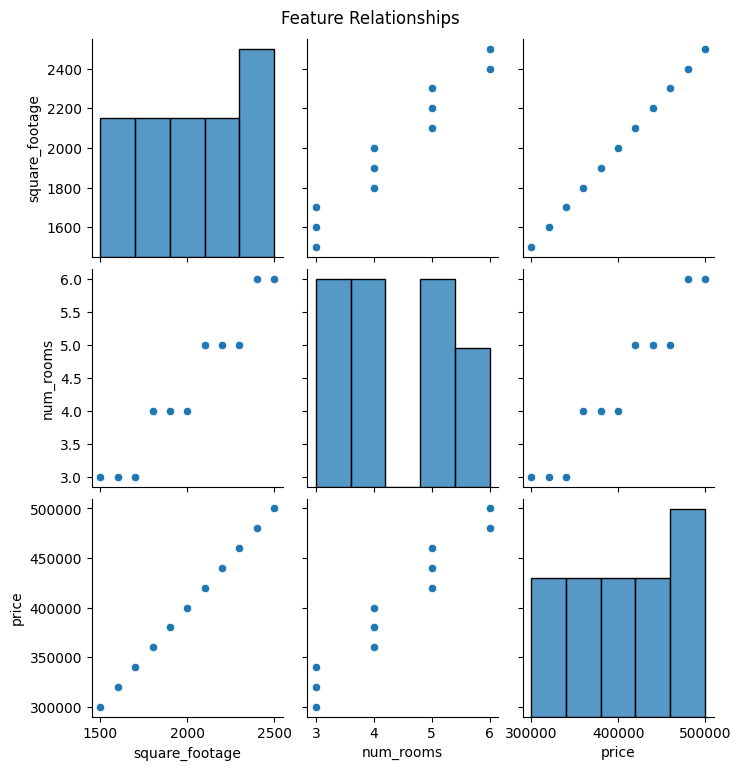

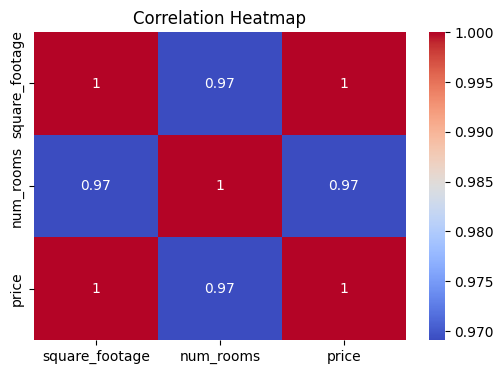

In [3]:
# Pair plot to see distributions
sns.pairplot(df)
plt.suptitle("Feature Relationships", y=1.02)
plt.show()

# Heatmap to check correlation
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [4]:
# Define features and target
X = df[["square_footage", "num_rooms"]]
y = df["price"]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [ 2.00000000e+02 -2.78830309e-12]
Model Intercept: -1.1641532182693481e-10


In [6]:
# Predictions
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 0.00
R^2 Score: 1.00


In [7]:
# Predict price of a new house
new_house = pd.DataFrame({
    "square_footage": [2100],
    "num_rooms": [4]
})

predicted_price = model.predict(new_house)
print(f"Predicted Price for 2100 sqft & 4 rooms: ${predicted_price[0]:,.2f}")


Predicted Price for 2100 sqft & 4 rooms: $420,000.00


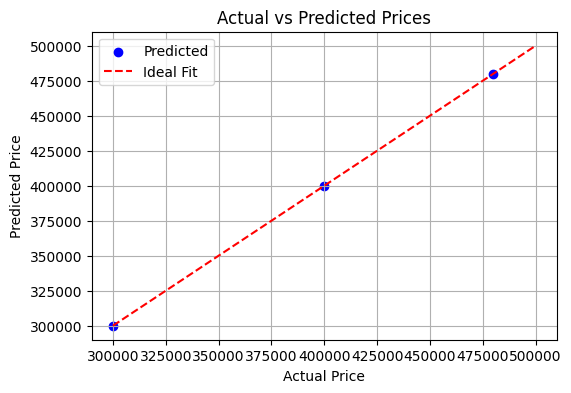

In [8]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color="blue", label="Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", label="Ideal Fit")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Calculate RMSE

print(f"R² Score: {r2:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

R² Score: 1.00
MSE: 0.00
RMSE: 0.00
MAE: 0.00


In [11]:
# Get R² score
r2 = r2_score(y_test, y_pred)

# Convert R² to percentage
accuracy_percent = r2 * 100
print(f"Model Accuracy (R² Score): {accuracy_percent:.2f}%")


Model Accuracy (R² Score): 100.00%
